In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('Final_Dataset.csv')
df.head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Cognitive enhancement drugs, also known as nootropics, are substances that allegedly improve brain function, memory, creativity, and focus. These drugs have become increasingly popular in recent years, with many people using them to boost their academic performance, career advancement, and overall quality of life. While the promise of enhanced cognitive abilities may seem appealing, the ethical implications of using these drugs are complex and multifaceted. This paper will explore the ethical issues surrounding cognitive enhancement drugs by examining their potential benefits and risks, the role of individual autonomy, fairness in education and employment, and the impact on society as a whole.\n\nThe potential benefits of cognitive enhancement drugs are considerable. For individuals struggling with cognitive disorders such as ADHD or dementia, these drugs can provide much-needed relief and improve their quality of life. They also hold promise for treating neurological conditions like Alzheimer's disease and stroke. Furthermore, for healthy individuals, cognitive enhancement drugs may enable them to learn new skills more efficiently or perform better at their jobs.\n\nOn the other hand, there are significant risks associated with these drugs. Some prescription drugs used for cognitive enhancement, such as Ritalin and Adderall, are highly addictive and can lead to dependency and other negative health consequences. Even natural supplements like ginseng and fish oil, while generally considered safe, can have unpredictable side effects and interact with other medications. There is also the potential for abuse; athletes and students may misuse these drugs to gain an unfair advantage in competitive situations.\n\nAnother ethical consideration is the role of individual autonomy in the decision to use cognitive enhancement drugs. Proponents argue that individuals should have the right to choose whether or not to use these drugs, as it is their body and their life. They point out that many people already use caffeine or other stimulants to improve their focus and productivity, and that cognitive enhancement drugs are simply a more potent version of these substances. On the other hand, critics argue that the potential risks of these drugs outweigh any perceived benefits and that individuals may not fully understand the long-term consequences of their decisions.\n\nThe issue of fairness in education and employment is also relevant. If cognitive enhancement drugs become widely available and accepted, students who use them may have an unfair advantage over those who do not. This could lead to a "drug arms race" where students feel pressured to use these drugs just to keep up with their peers. Similarly, in the workplace, employees who use cognitive enhancement drugs may be given preference for promotions or important projects, creating a situation where those who do not use the drugs are at a disadvantage.\n\nFinally, there is the question of how the widespread use of cognitive enhancement drugs might impact society as a whole. Some argue that it could lead to a "superhuman" caste of individuals who are vastly more productive and successful than everyone else, widening the gap between the haves and have-nots. Others worry that it could erode our sense of personal identity and authenticity, as we become increasingly reliant on external substances to achieve success.\n\nIn conclusio

1. Distribusi Human vs AI (treemap)
2. GLTR PPL GPTlarge(human vs ai) & GPTneo(human vs ai)

   2a. tren terhadap label apa, liat behaviour ai dan human

Konklusi per plot (ppl ai lebih rendah or something)
Konklusi akhir ada tren di setiap fitur



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394350 entries, 0 to 394349
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   text                       394350 non-null  object 
 1   source                     394350 non-null  object 
 2   prompt_id                  394350 non-null  int64  
 3   text_length                394350 non-null  int64  
 4   word_count                 394350 non-null  int64  
 5   label                      394350 non-null  int64  
 6   gpt-neo-125m-text_ppl      394350 non-null  float64
 7   gpt-neo-125m-max_sent_ppl  394350 non-null  float64
 8   gpt-neo-125m-sent_ppl_avg  394350 non-null  float64
 9   gpt-neo-125m-sent_ppl_std  394350 non-null  float64
 10  gpt-neo-125m-max_step_ppl  394350 non-null  float64
 11  gpt-neo-125m-step_ppl_avg  394350 non-null  float64
 12  gpt-neo-125m-step_ppl_std  394350 non-null  float64
 13  gpt-neo-125m-rank_0        39

## 1. Source Distribution

In [7]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [8]:
df['source'].value_counts()

source
Human                        174144
GPT-3.5                       25945
Text-Davinci-003              11494
Text-Davinci-002              10695
OPT-1.3B                       9219
OPT-30B                        8978
Nous-Hermes-LLaMA-2-13B        6482
Mistral-7B                     5270
PaLM-2                         4853
OpenChat-3.5                   4766
LLaMA-30B                      4660
LLaMA-65B                      4635
OPT-2.7B                       4630
Flan-T5-Large                  4629
Flan-T5-Base                   4601
LLaMA-13B                      4598
T0-3B                          4588
Flan-T5-Small                  4585
LLaMA-7B                       4548
GLM-130B                       4513
Flan-T5-XXL                    4490
OPT-125M                       4463
GPT-4                          4414
T0-11B                         4389
OPT-350M                       4364
Flan-T5-XL                     4345
Bloom-7B                       4335
OPT-6.7B             

In [9]:
df['label'].value_counts()

label
1    220206
0    174144
Name: count, dtype: int64

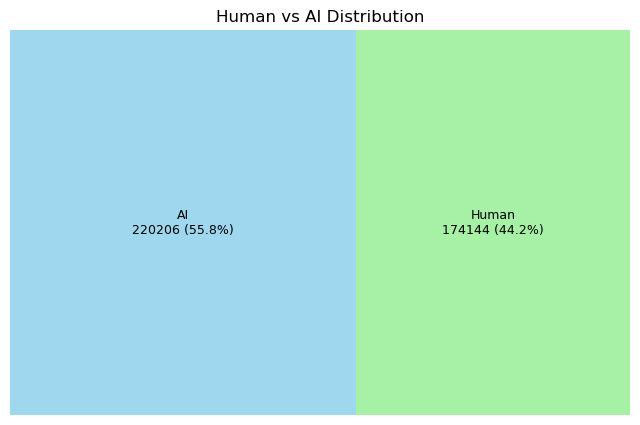

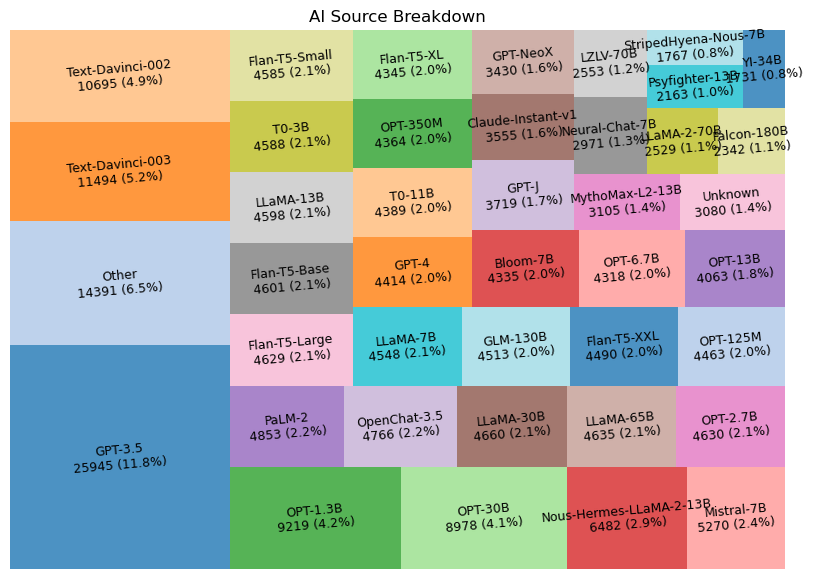

In [15]:
import matplotlib.pyplot as plt
import squarify  # For treemap

# Assuming 'df' is your DataFrame
df['source_category'] = df['source'].apply(lambda x: 'Human' if x.lower() == 'human' else 'AI')

source_distribution = df['source_category'].value_counts()

# Calculate percentages for Human vs AI
total_count = source_distribution.sum()
source_distribution_percentage = (source_distribution / total_count) * 100

# Plot the first treemap (Human vs AI distribution)

labels = [f"{key}\n{value} ({source_distribution_percentage[key]:.1f}%)" for key, value in source_distribution.items()]


# Plot the treemap for Human vs AI
plt.figure(figsize=(8, 5))
ax = squarify.plot(
    sizes=source_distribution.values,
    # label=labels,
    alpha=0.8,
    color=['skyblue', 'lightgreen']
)

for i, rect in enumerate(ax.patches):
    x = rect.get_x() + rect.get_width() / 2  # x position for label
    y = rect.get_y() + rect.get_height() / 2  # y position for label
    ax.text(x, y, labels[i], ha='center', va='center', fontsize=9, color='black', rotation=0)

plt.title('Human vs AI Distribution')
plt.axis('off')
plt.show()
###########################################################################################
# For the AI breakdown, categorize AI sources with less than 1700 counts as 'Other'
ai_data = df[df['source_category'] == 'AI']
ai_counts = ai_data['source'].value_counts().reset_index()
ai_counts.columns = ['source', 'count']
ai_counts['source'] = ai_counts.apply(lambda row: row['source'] if row['count'] >= 1700 else 'Other', axis=1)
ai_counts = ai_counts.groupby('source').sum().reset_index()

# Sort AI counts in descending order
ai_counts = ai_counts.sort_values(by='count', ascending=False)

# Calculate percentages
total_count = ai_counts['count'].sum()
ai_counts['percentage'] = (ai_counts['count'] / total_count) * 100

# Create labels with counts and percentages
ai_counts['label'] = ai_counts.apply(
    lambda row: f"{row['source']}\n{row['count']} ({row['percentage']:.1f}%)", axis=1
)

# Treemap: AI Source Breakdown (sorted with counts and percentages in labels)
plt.figure(figsize=(10, 7))
ax = squarify.plot(
    sizes=ai_counts['count'],
    # label=ai_counts['label'],
    color=plt.cm.tab20.colors,
    alpha=0.8,
)

for i, rect in enumerate(ax.patches):
    x = rect.get_x() + rect.get_width() / 2  # x position for label
    y = rect.get_y() + rect.get_height() / 2  # y position for label
    ax.text(x, y, ai_counts['label'].iloc[i], ha='center', va='center', fontsize=9, rotation=5, color='black')

plt.title('AI Source Breakdown')
plt.axis('off')
plt.show()

## 2. General Exploration Human vs AI

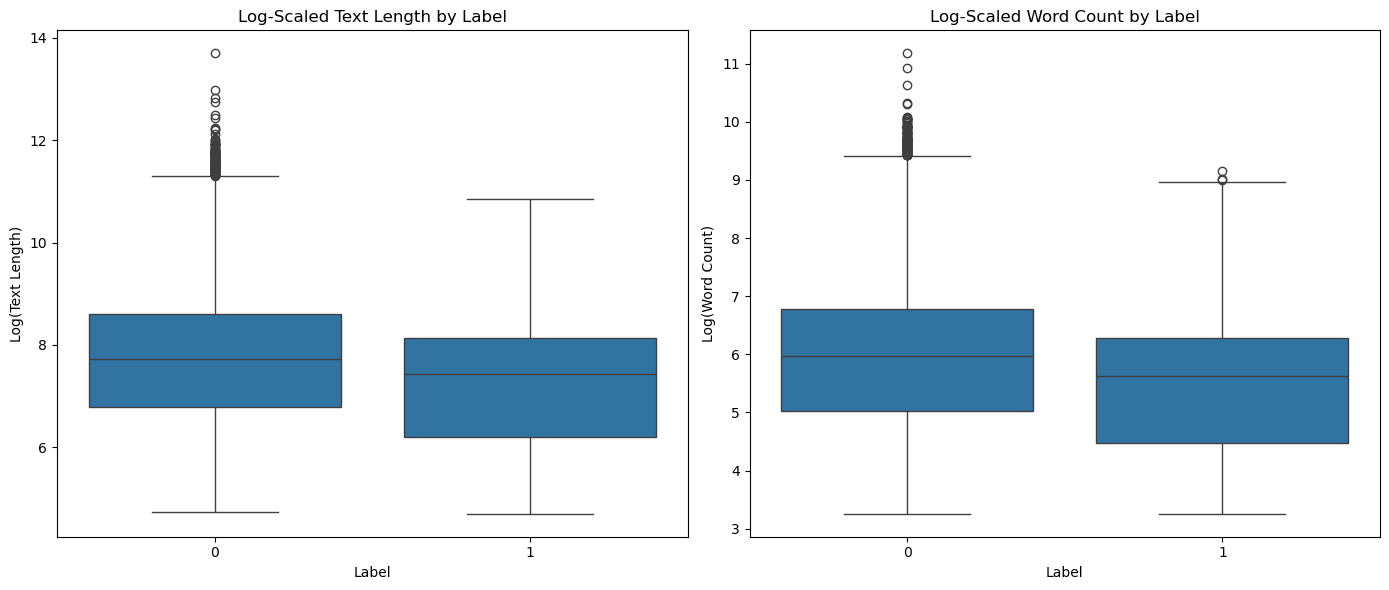

In [18]:
# Apply log transformation (add 1 to avoid log(0))
df['log_text_length'] = np.log1p(df['text_length'])
df['log_word_count'] = np.log1p(df['word_count'])

# Create box plots for the transformed features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='label', y='log_text_length', data=df, ax=axes[0])
axes[0].set_title('Log-Scaled Text Length by Label')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Log(Text Length)')

sns.boxplot(x='label', y='log_word_count', data=df, ax=axes[1])
axes[1].set_title('Log-Scaled Word Count by Label')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Log(Word Count)')

plt.tight_layout()
plt.show()


Teks hasil manusia lebih bervariasi dalam hal panjang teks dan jumlah kata.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394350 entries, 0 to 394349
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   text                       394350 non-null  object 
 1   source                     394350 non-null  object 
 2   prompt_id                  394350 non-null  int64  
 3   text_length                394350 non-null  int64  
 4   word_count                 394350 non-null  int64  
 5   label                      394350 non-null  int64  
 6   gpt-neo-125m-text_ppl      394350 non-null  float64
 7   gpt-neo-125m-max_sent_ppl  394350 non-null  float64
 8   gpt-neo-125m-sent_ppl_avg  394350 non-null  float64
 9   gpt-neo-125m-sent_ppl_std  394350 non-null  float64
 10  gpt-neo-125m-max_step_ppl  394350 non-null  float64
 11  gpt-neo-125m-step_ppl_avg  394350 non-null  float64
 12  gpt-neo-125m-step_ppl_std  394350 non-null  float64
 13  gpt-neo-125m-rank_0        39

### GPT NEO

#### PPL

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

perplexity_features = [
    'gpt-neo-125m-text_ppl', 'gpt-neo-125m-max_sent_ppl', 'gpt-neo-125m-sent_ppl_avg', 
    'gpt-neo-125m-sent_ppl_std', 'gpt-neo-125m-max_step_ppl', 'gpt-neo-125m-step_ppl_avg',
    'gpt-neo-125m-step_ppl_std',
]

winsorized_features = []

for feature in perplexity_features:
    winsorized_column = feature + '_winsor'
    df[winsorized_column] = winsorize(df[feature], limits=[0.1, 0.1])
    winsorized_features.append(winsorized_column)



In [27]:
winsorized_features

['gpt-neo-125m-text_ppl_winsor',
 'gpt-neo-125m-max_sent_ppl_winsor',
 'gpt-neo-125m-sent_ppl_avg_winsor',
 'gpt-neo-125m-sent_ppl_std_winsor',
 'gpt-neo-125m-max_step_ppl_winsor',
 'gpt-neo-125m-step_ppl_avg_winsor',
 'gpt-neo-125m-step_ppl_std_winsor']

C:\Users\LEGION 5\AppData\Local\Temp\ipykernel_24436\2267966820.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')
C:\Users\LEGION 5\AppData\Local\Temp\ipykernel_24436\2267966820.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')
C:\Users\LEGION 5\AppData\Local\Temp\ipykernel_24436\2267966820.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')
C:\Users\LEGION 5\AppData\Local\Temp\ipyker

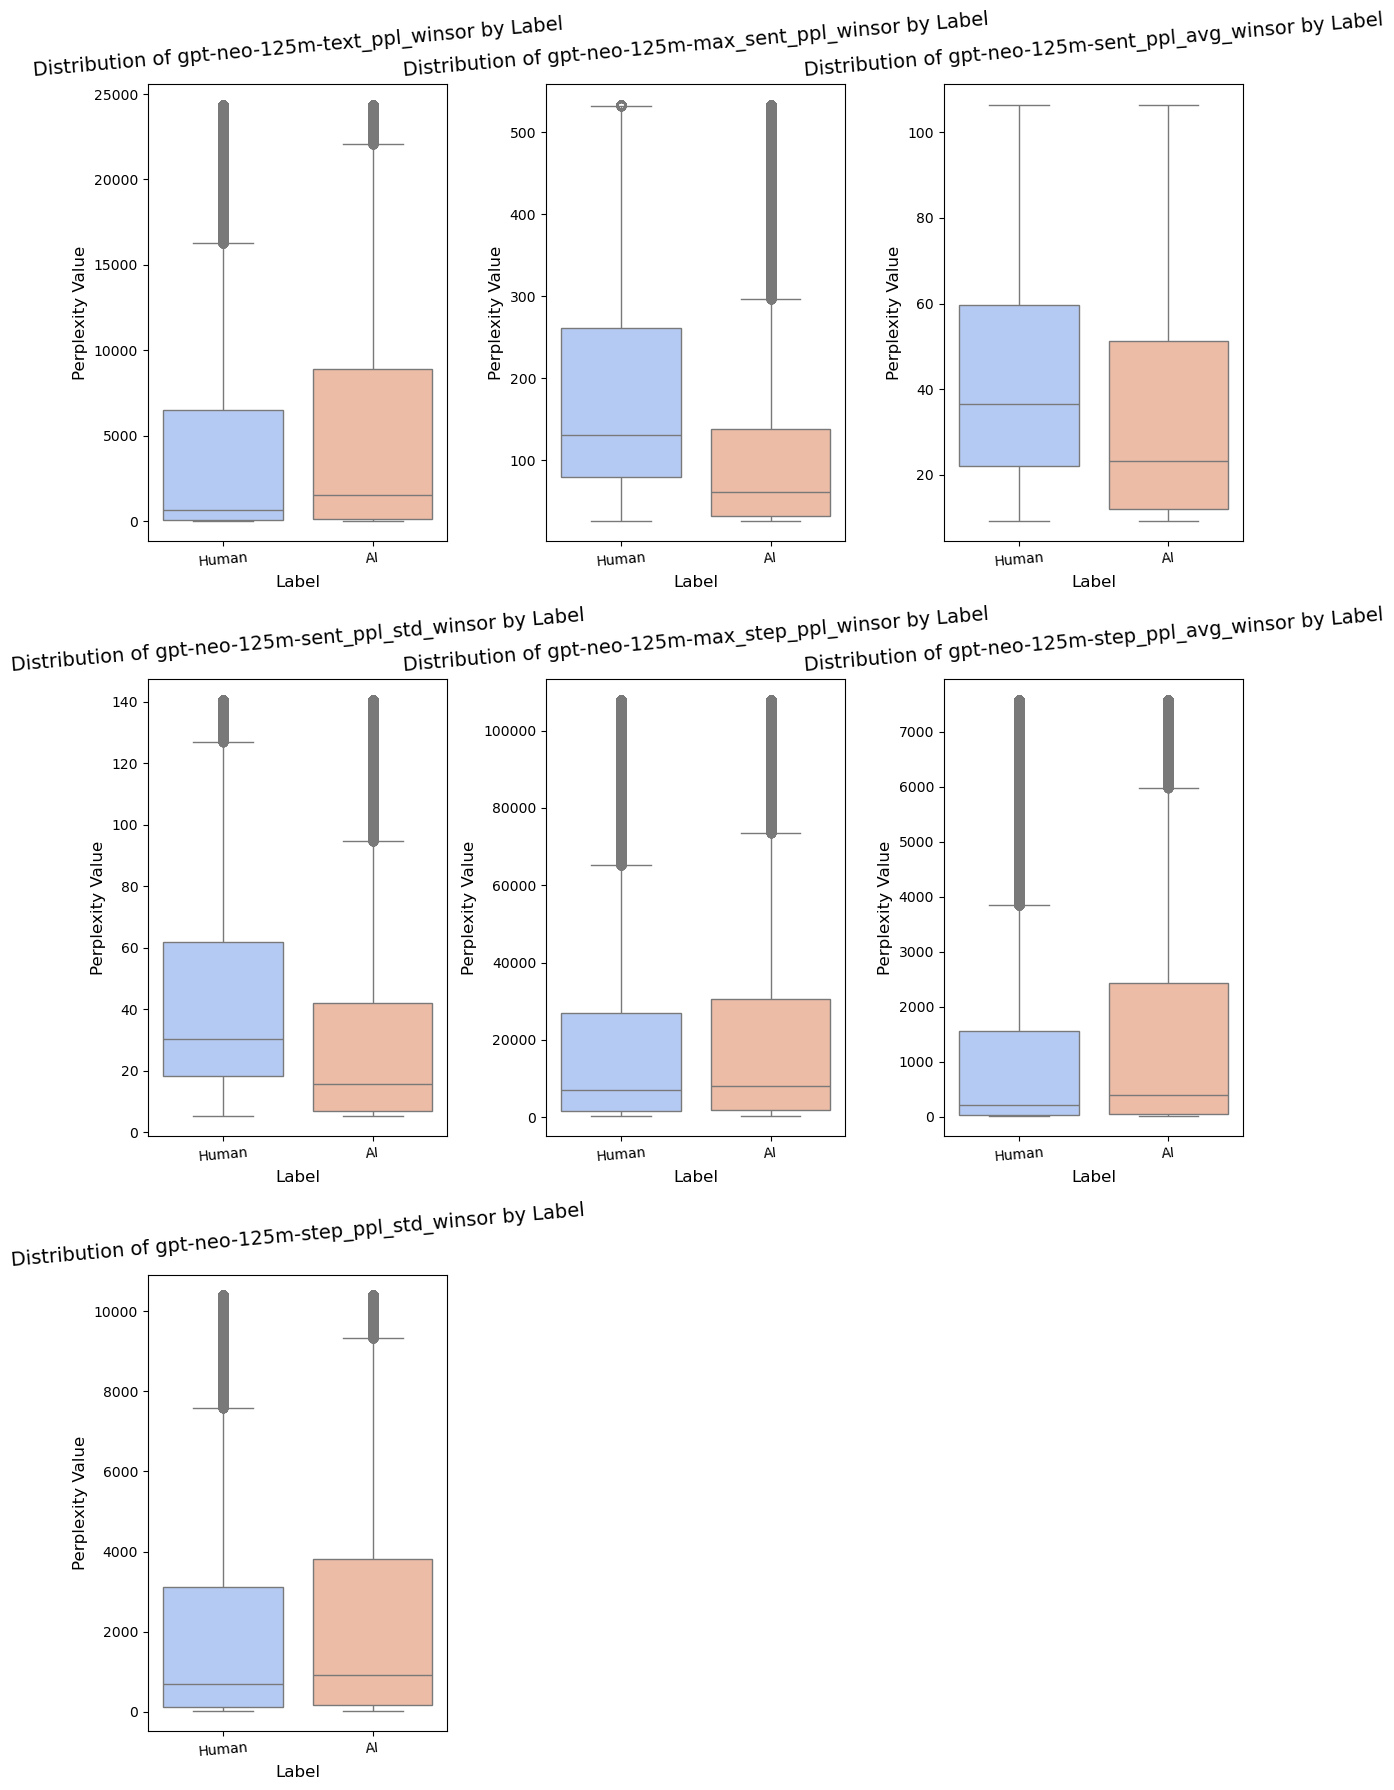

In [29]:
# Set up the figure size and grid layout for the plots
n_cols = 3
n_rows = int(np.ceil(len(winsorized_features) / n_cols))  # Calculate number of rows based on number of columns

plt.figure(figsize=(12, 6 * n_rows))

# Iterate over each perplexity feature
for i, feature in enumerate(winsorized_features, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplot in a 3-column grid

    # Plot the box plot for Human vs AI
    sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')

    # Add labels and title with rotation for the title
    plt.title(f'Distribution of {feature} by Label', fontsize=14, rotation=5)
    plt.xlabel('Label', fontsize=12)
    plt.ylabel('Perplexity Value', fontsize=12)

    # Rotate x-axis labels by 45 degrees
    plt.xticks(ticks=[0, 1], labels=['Human', 'AI'], rotation=5)

# Adjust the layout and show the plot
plt.tight_layout()
plt.savefig('GPTNEO_PPL.png', dpi=300, bbox_inches='tight')
plt.show()



#### GLTR

C:\Users\LEGION 5\AppData\Local\Temp\ipykernel_24436\2744188297.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')
C:\Users\LEGION 5\AppData\Local\Temp\ipykernel_24436\2744188297.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')
C:\Users\LEGION 5\AppData\Local\Temp\ipykernel_24436\2744188297.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')
C:\Users\LEGION 5\AppData\Local\Temp\ipyker

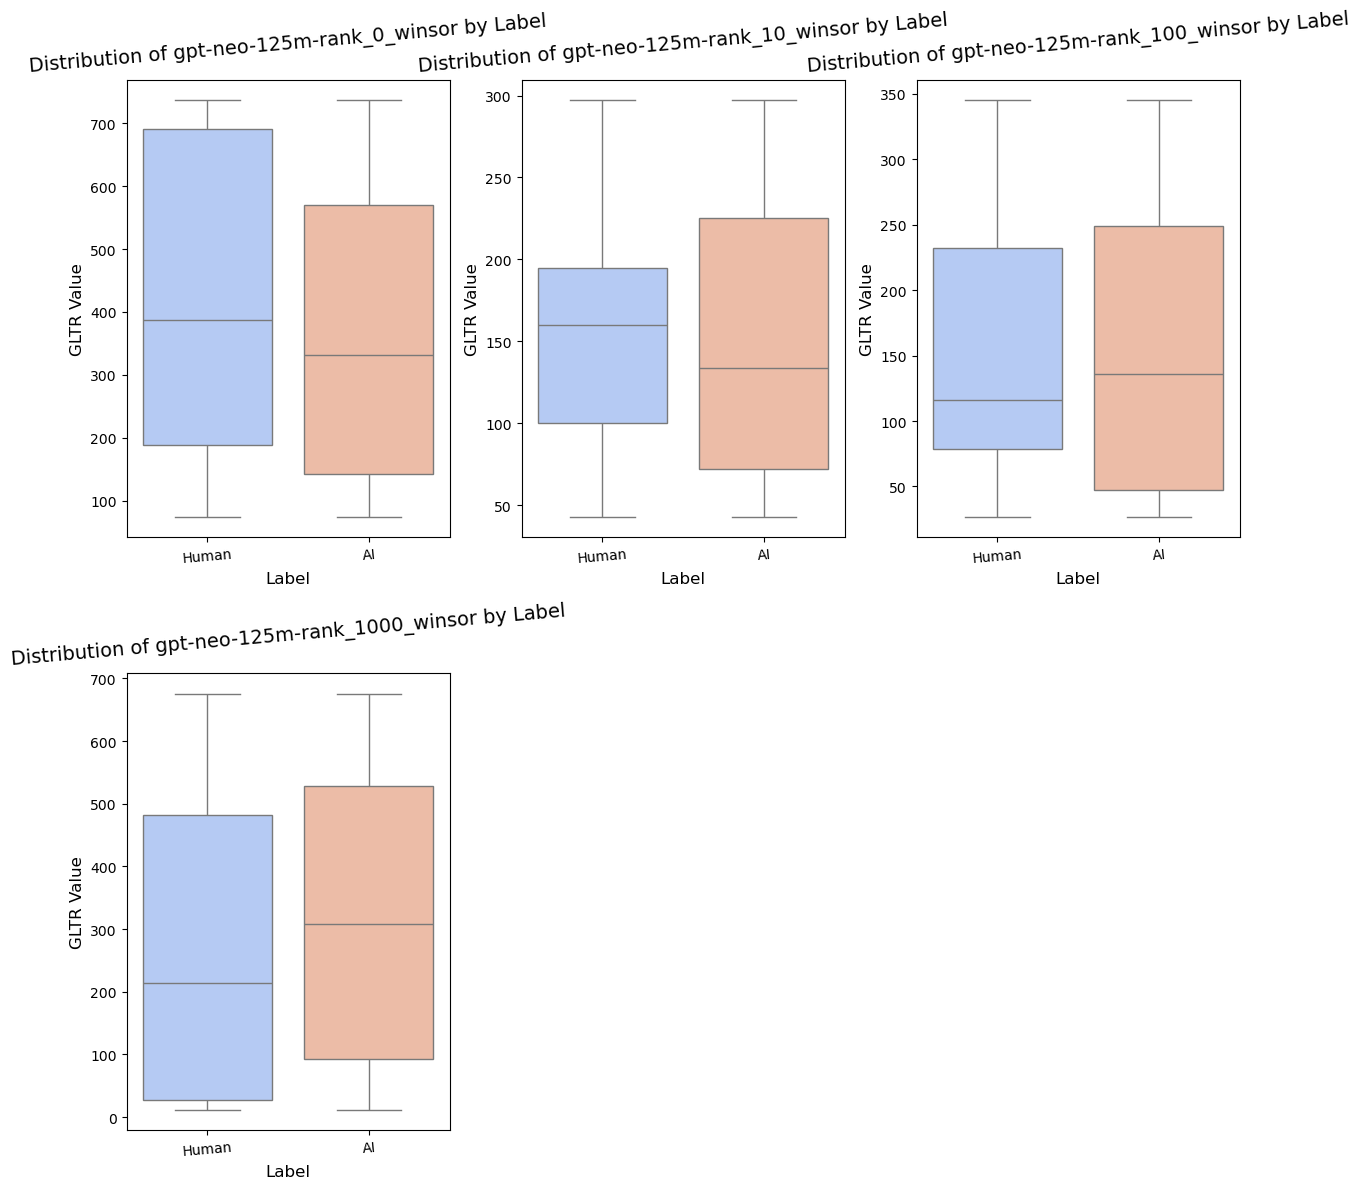

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

perplexity_features = [
    'gpt-neo-125m-rank_0', 'gpt-neo-125m-rank_10', 'gpt-neo-125m-rank_100', 
    'gpt-neo-125m-rank_1000',
]

winsorized_features = []

for feature in perplexity_features:
    winsorized_column = feature + '_winsor'
    df[winsorized_column] = winsorize(df[feature], limits=[0.1, 0.1])
    winsorized_features.append(winsorized_column)



# Set up the figure size and grid layout for the plots
n_cols = 3
n_rows = int(np.ceil(len(winsorized_features) / n_cols))  # Calculate number of rows based on number of columns

plt.figure(figsize=(12, 6 * n_rows))

# Iterate over each perplexity feature
for i, feature in enumerate(winsorized_features, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplot in a 3-column grid

    # Plot the box plot for Human vs AI
    sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')

    # Add labels and title with rotation for the title
    plt.title(f'Distribution of {feature} by Label', fontsize=14, rotation=5)
    plt.xlabel('Label', fontsize=12)
    plt.ylabel('GLTR Value', fontsize=12)

    # Rotate x-axis labels by 45 degrees
    plt.xticks(ticks=[0, 1], labels=['Human', 'AI'], rotation=5)

# Adjust the layout and show the plot
plt.tight_layout()
plt.savefig('GPTNEO_GLTR.png', dpi=300, bbox_inches='tight')
plt.show()



### GPT2 Large

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394350 entries, 0 to 394349
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   text                              394350 non-null  object 
 1   source                            394350 non-null  object 
 2   prompt_id                         394350 non-null  int64  
 3   text_length                       394350 non-null  int64  
 4   word_count                        394350 non-null  int64  
 5   label                             394350 non-null  int64  
 6   gpt-neo-125m-text_ppl             394350 non-null  float64
 7   gpt-neo-125m-max_sent_ppl         394350 non-null  float64
 8   gpt-neo-125m-sent_ppl_avg         394350 non-null  float64
 9   gpt-neo-125m-sent_ppl_std         394350 non-null  float64
 10  gpt-neo-125m-max_step_ppl         394350 non-null  float64
 11  gpt-neo-125m-step_ppl_avg         394350 non-null  f

#### PPL

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

perplexity_features = [
    'gpt2-large-text_ppl', 'gpt2-large-max_sent_ppl', 'gpt2-large-sent_ppl_avg', 
    'gpt2-large-sent_ppl_std', 'gpt2-large-max_step_ppl', 'gpt2-large-step_ppl_avg',
    'gpt2-large-step_ppl_std',
]

winsorized_features = []

for feature in perplexity_features:
    winsorized_column = feature + '_winsor'
    df[winsorized_column] = winsorize(df[feature], limits=[0.1, 0.1])
    winsorized_features.append(winsorized_column)



C:\Users\LEGION 5\AppData\Local\Temp\ipykernel_24436\3679314958.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')
C:\Users\LEGION 5\AppData\Local\Temp\ipykernel_24436\3679314958.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')
C:\Users\LEGION 5\AppData\Local\Temp\ipykernel_24436\3679314958.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')
C:\Users\LEGION 5\AppData\Local\Temp\ipyker

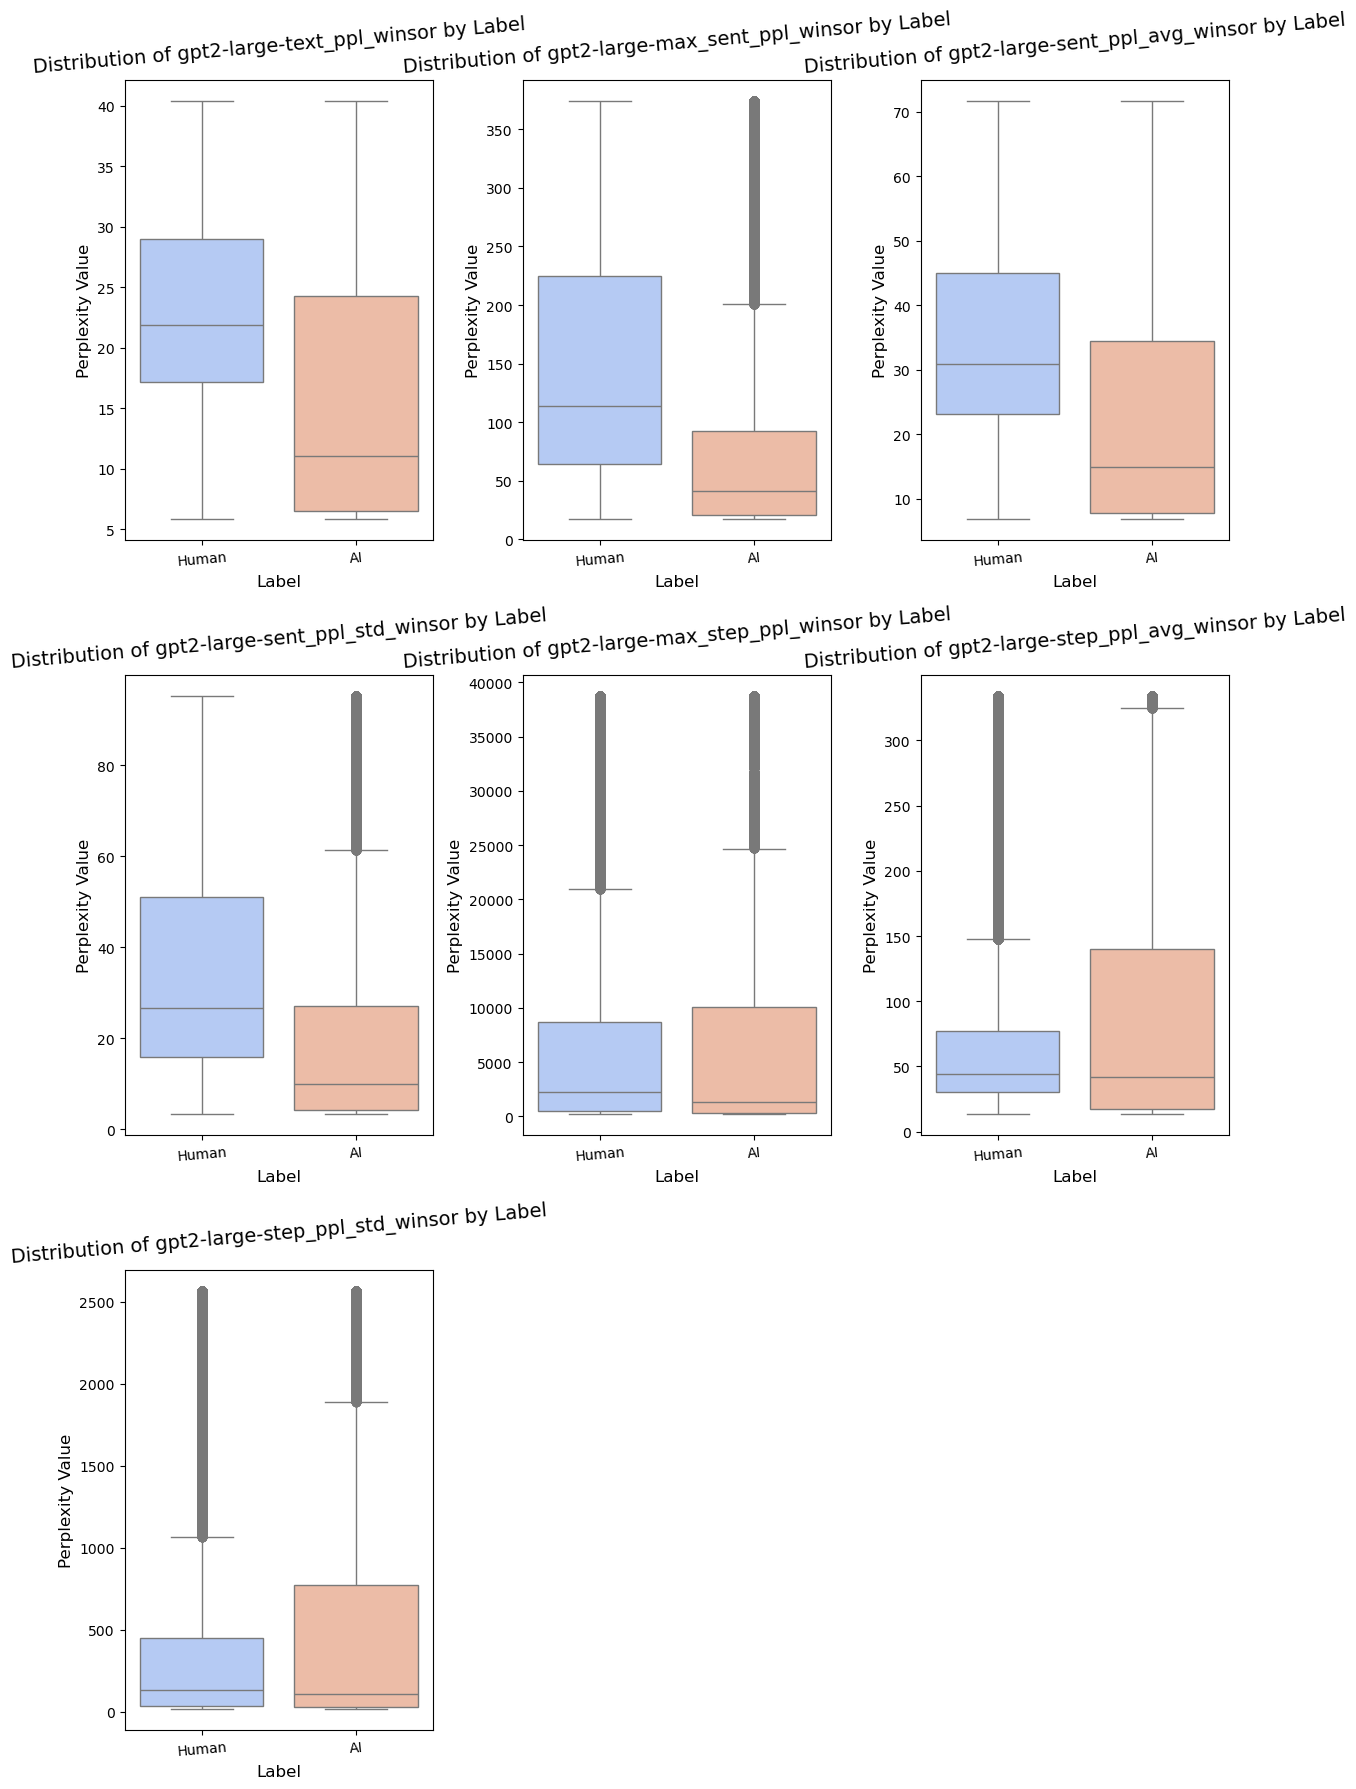

In [35]:
# Set up the figure size and grid layout for the plots
n_cols = 3
n_rows = int(np.ceil(len(winsorized_features) / n_cols))  # Calculate number of rows based on number of columns

plt.figure(figsize=(12, 6 * n_rows))

# Iterate over each perplexity feature
for i, feature in enumerate(winsorized_features, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplot in a 3-column grid

    # Plot the box plot for Human vs AI
    sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')

    # Add labels and title with rotation for the title
    plt.title(f'Distribution of {feature} by Label', fontsize=14, rotation=5)
    plt.xlabel('Label', fontsize=12)
    plt.ylabel('Perplexity Value', fontsize=12)

    # Rotate x-axis labels by 45 degrees
    plt.xticks(ticks=[0, 1], labels=['Human', 'AI'], rotation=5)

# Adjust the layout and show the plot
plt.tight_layout()

plt.savefig('GPT2Large_PPL.png', dpi=300, bbox_inches='tight')  # Change the file name and format as needed
plt.show()


#### GLTR

C:\Users\LEGION 5\AppData\Local\Temp\ipykernel_24436\1811736166.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')
C:\Users\LEGION 5\AppData\Local\Temp\ipykernel_24436\1811736166.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')
C:\Users\LEGION 5\AppData\Local\Temp\ipykernel_24436\1811736166.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')
C:\Users\LEGION 5\AppData\Local\Temp\ipyker

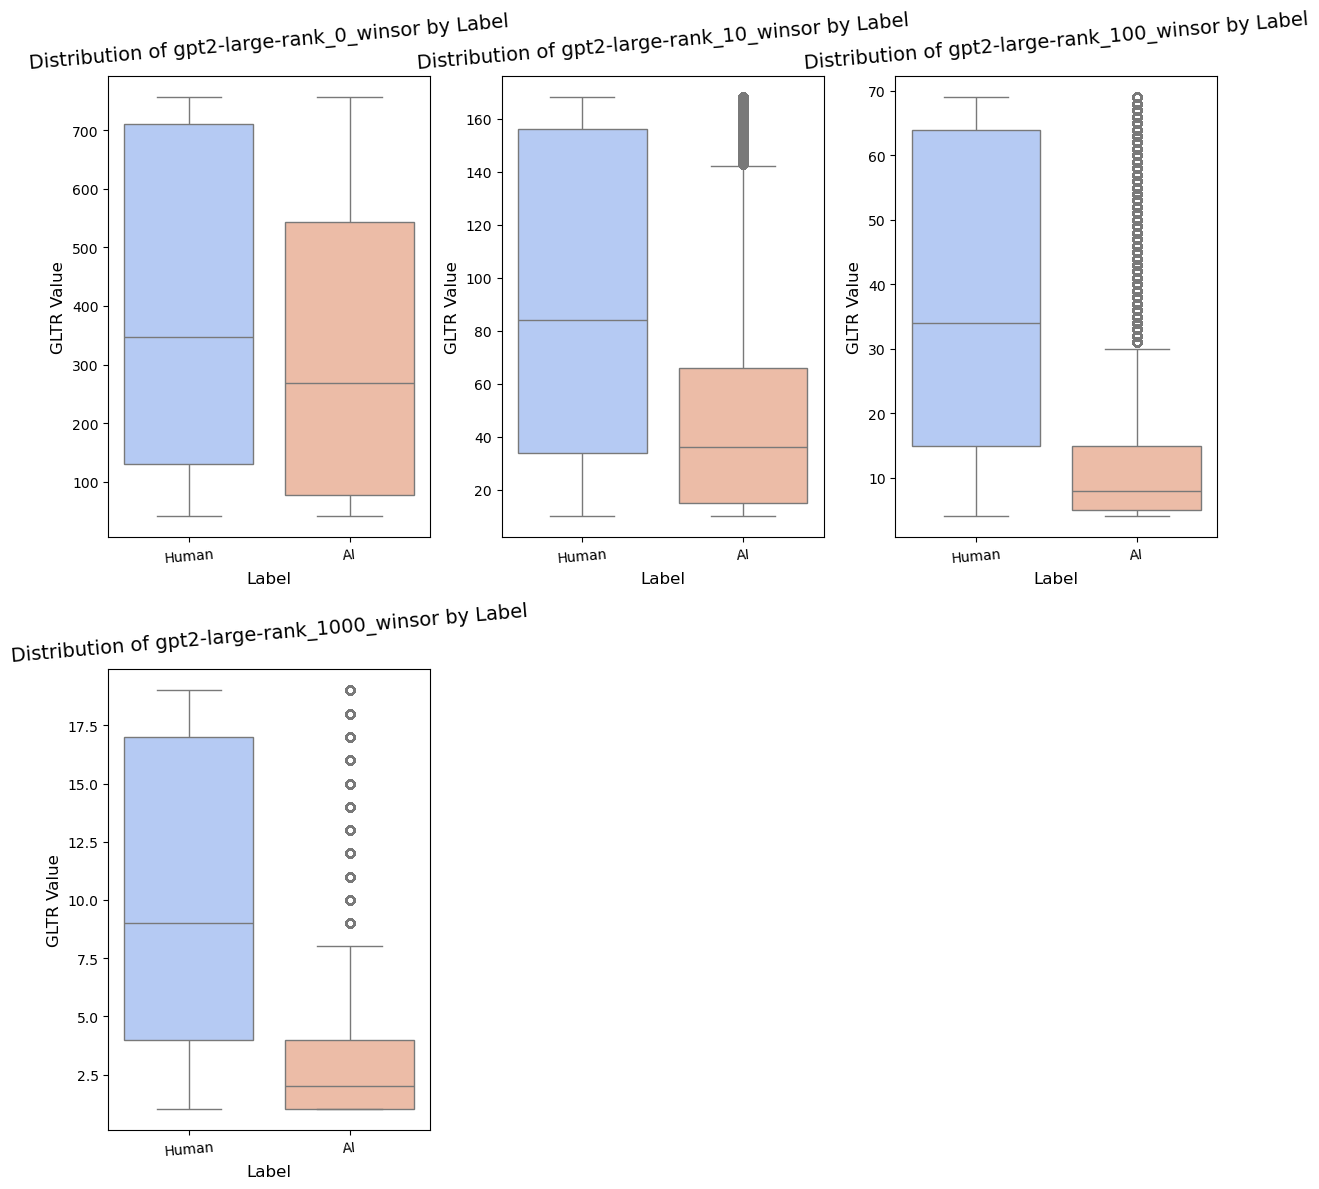

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

perplexity_features = [
    'gpt2-large-rank_0', 'gpt2-large-rank_10', 'gpt2-large-rank_100', 
    'gpt2-large-rank_1000',
]

winsorized_features = []

for feature in perplexity_features:
    winsorized_column = feature + '_winsor'
    df[winsorized_column] = winsorize(df[feature], limits=[0.1, 0.1])
    winsorized_features.append(winsorized_column)


# Set up the figure size and grid layout for the plots
n_cols = 3
n_rows = int(np.ceil(len(winsorized_features) / n_cols))  # Calculate number of rows based on number of columns

plt.figure(figsize=(12, 6 * n_rows))

# Iterate over each perplexity feature
for i, feature in enumerate(winsorized_features, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplot in a 3-column grid

    # Plot the box plot for Human vs AI
    sns.boxplot(x='label', y=feature, data=df, palette='coolwarm')

    # Add labels and title with rotation for the title
    plt.title(f'Distribution of {feature} by Label', fontsize=14, rotation=5)
    plt.xlabel('Label', fontsize=12)
    plt.ylabel('GLTR Value', fontsize=12)

    # Rotate x-axis labels by 45 degrees
    plt.xticks(ticks=[0, 1], labels=['Human', 'AI'], rotation=5)

# Adjust the layout and show the plot
plt.tight_layout()
plt.savefig('GPT2Large_GLTR.png', dpi=300, bbox_inches='tight')
plt.show()

